<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/DL/%EB%B0%91%EB%B0%94%EB%8B%A5%EB%B6%80%ED%84%B0_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EB%94%A5%EB%9F%AC%EB%8B%9D_3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://compmath.korea.ac.kr/appmath2021/Perceptron.html

밑바닥부터 시작하는 딥러닝

딥 러닝을 이용한 자연어 처리 입문 https://wikidocs.net/24958

# 3.1 신경망

## 3.1.1 신경망이란

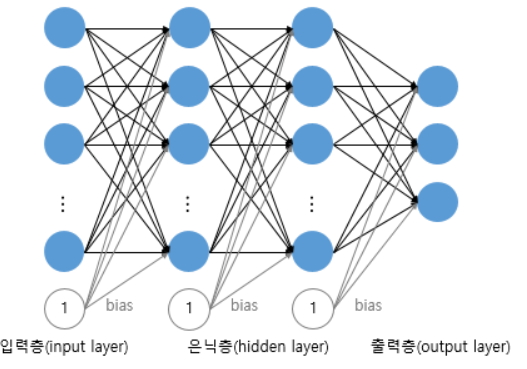

입력층(input layer): 처음 raw 데이터가 들어가는 층  
출력층(ouput layer): 결과가 출력되는 층  
은닉층(hidden layer): 입력층과 출력층과 달리 눈에 안보이며, 입력층에서 데이터를 받아 출력층까지 전달하는 층


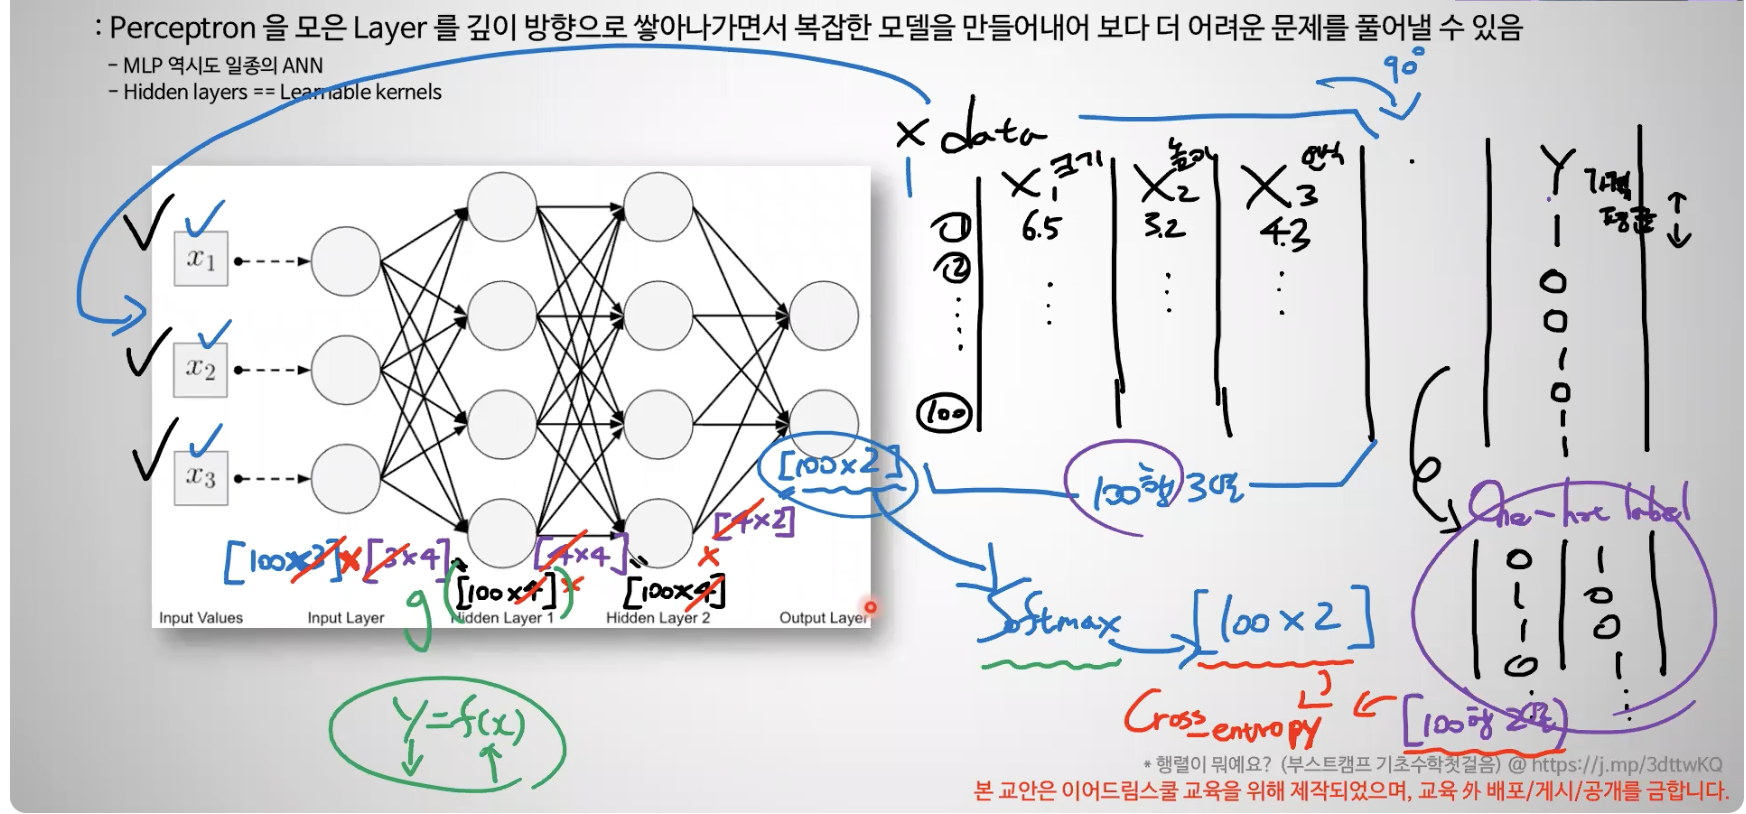

# 3.2 활성화함수

$$
a = (b + w_1x_1 + w_2x_2)
$$
$$
y = h(a)
$$

**활성화 함수(activation function) $h(x)$**는 입력 신호의 총합을 출력 신호로 변환하는 함수이다.  
위 식에서 나타내듯 활성화 함수는 먼저 가중치가 곱해진 입력 신호의 총합($a$)를 계산하고, 활성화 함수 $h(x)$에 입력해 y를 출력하게 된다.

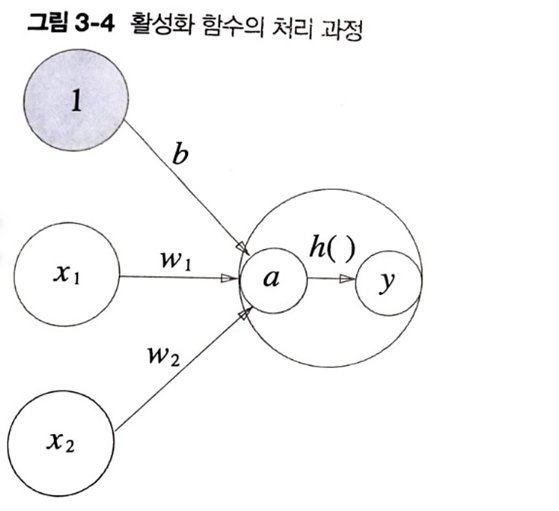

# 3.3 활성화 함수의 종류

### 3.3.1 계단 함수 step function

퍼셉트론에서 사용한 임계값을 경계로 출력이 바뀌는 함수를 **계단 함수(step function)**이라고 한다.
- 입력이 작으면 출력은 0이 되고 임계값보다 입력 값이 높아지면 출력이 1이 된다.

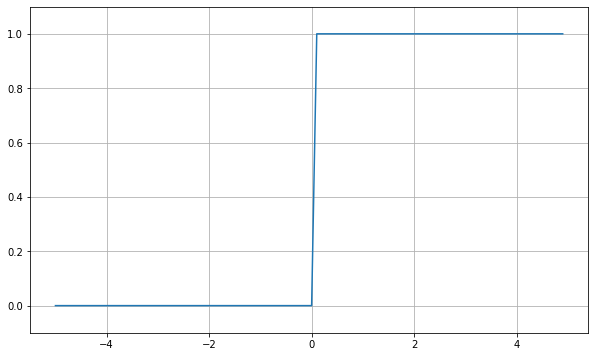

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 계단 함수의 코드 구현
def step_function(x):
    return np.array(x > 0, dtype=int)
    
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.show()

### 3.3.2 시그모이드 함수 sigmoid function

$$
h(x) = \frac{1}{1 + exp(-x)} 
$$


시그모이드 함수는 얼핏보면 복잡해보이지만 이 함수도 계단 함수와 같이 입력값이 주어지면 출력을 돌려주는 단순한 함수일 뿐이다.  예를 들어 h(1.0) = 0.731.. 과 같은 특정 정해진 값을 출력하게 된다.
- 입력이 작으면 0에 가깝고, 입력이 커지면 1에 가까워진다. 아무리 작거나 커도 출력은 0과 1사이값이다.
- 시그모이드 함수의 미분 최대값 0.25

In [17]:
# 시그모이드 함수의 코드 구현
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.array([-1,1,2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


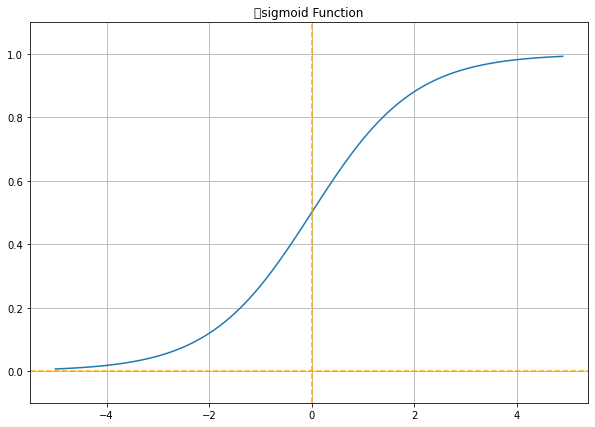

In [18]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.grid()
plt.axhline(y=0, color='orange', linestyle='--')
plt.axvline(x=0, color='orange', linestyle='--')
plt.ylim(-0.1,1.1) # y축의 범위 지정
plt.title('sigmoid Function')
plt.show()

### 3.3.3 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

하이퍼볼릭탄젠트 함수(tanh)는 입력값을 -1과 1사이의 값으로 변환합니다. 하이퍼볼릭탄젠트 함수를 미분했을 때의 최대값은 1로 시그모이드 함수의 최대값인 0.25보다는 큽니다. 다시 말해 미분했을 때 시그모이드 함수보다는 전반적으로 큰 값이 나오게 됩니다. 

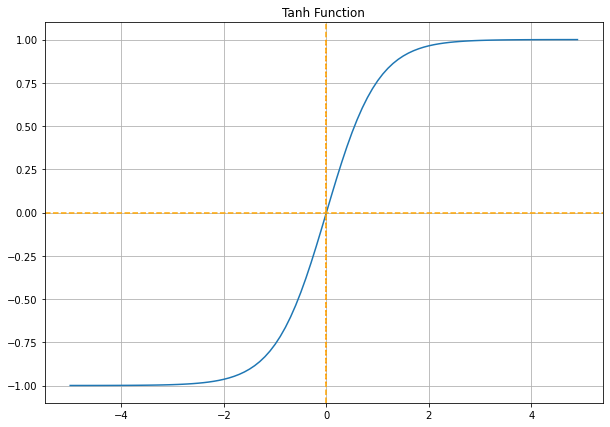

In [19]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.axvline(x=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

### 3.3.4 ReLu 함수

렐루 함수는 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환  
0이상의 입력값의 경우에는 미분값이 항상 1  
0미만의 입력값 즉 입력값이 음수면 미분값도 0

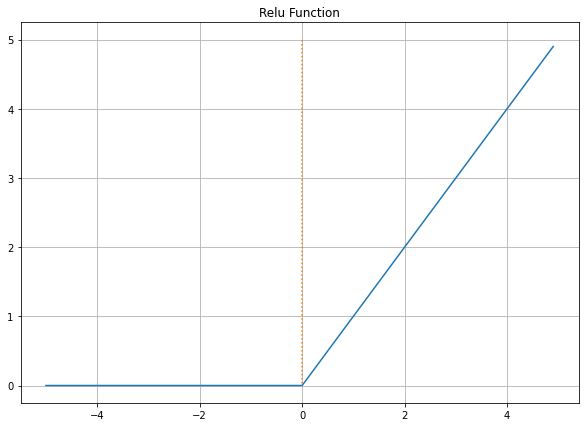

In [20]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.figure(figsize=(10,7))
plt.grid()
plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

### 3.3.5 리키 렐루 Leaky ReLU함수

Leaky ReLU는 입력값이 음수일 경우에 0이 아니라 -0.01과 같은 매우 작은 수를 반환하도록 되어 있다.  
a는 하이퍼파라미터로 Leaky('새는') 정도를 결정, 일반적으로는 0.01의 값을 가진다.

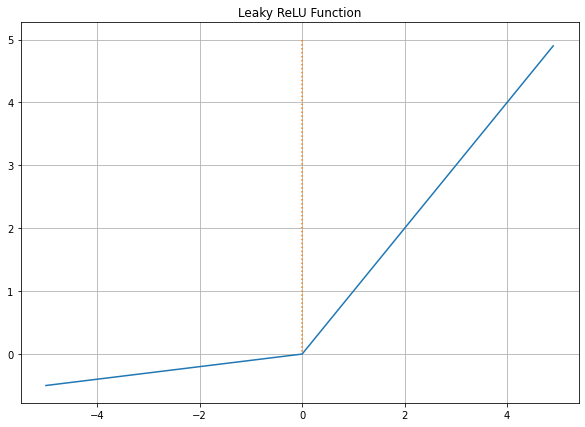

In [21]:
a = 0.1 # Leaky 새는 정도를 결정하는 하이퍼파라미터

def leaky_relu(x):
    return np.maximum(a*x, x)
plt.figure(figsize=(10,7))
x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)
plt.grid()
plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

### 3.3.6 Exponential ReLU 함수

### 3.3.7 Softmax함수

Softmax함수는 다른 활성화함수와는 조금 다르다. Softmax함수는 분류 모델에서 출력층에 주로 사용되는 활성화함수이다. Softmax의 식은 아래와 같다.

$$
y_k = \frac{exp(a_k)}{\displaystyle\sum_{i=1}^{n} exp(a_i)} 
$$

얼핏보면 굉장히 복잡해보이지만 분자와 분모의 의미를 생각해보면 그렇게 복잡하진 않다.  
분모의 n은 출력층의 뉴런 수, 분자의 k는 그 뉴런들 중 k번째 수를 의미한다. 분모는 모든 입력 신호의 지수함수 합이며, 분자는 해당 뉴런 k가 받은 입력 신호의 지수함수이다.  
즉 $y_k$란 입력 신호들 중 k번째 노드가 받은 입력 신호의 비중을 말한다. 따라서 모든 softmax 값들의 합은 1이다.
$$
\displaystyle\sum_{i=1}^{n} y_i = 1
$$

직관적으로 해석하자면 softmax는 각 노드가 1(True)일 확률을 뜻한다.  

In [5]:
# Softmax 예시
a = np.array([0.3, 2.9, 4.0]) # 임의의 값 즉 출력층 softmax에 들어가게 될 값 

exp_a = np.exp(a)# 지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [6]:
# 함수화
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    return exp_a/sum_exp_a

a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

위 함수식은 컴퓨터로 지수함수를 계산할 때 문제가 생길 수 있다. 지수 함수는 입력값이 조금만 커져도 아주 큰 값을 낸다. 예를 들어 $e^{10}$은 벌써 20,000이 넘는 수가 된다. 심지어 $e^{1000}$은 무한대의 수를 출력하게 되어버린다. 아래 코드는 이를 방지하기 위해 각 노드에 최대값의 노드를 뺀다. softmax 함수는 결국 비중을 계산하는 식임으로 각 노드에 같은 값이 빠져도 계산값에는 영향이 없다.

In [22]:
# 함수화
def softmax(a):
    c = np.max(a) # 최대값의 노드
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a/sum_exp_a

a = np.array([0.3, 2.9, 4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

# 3.4 신경망의 내적 계산구조

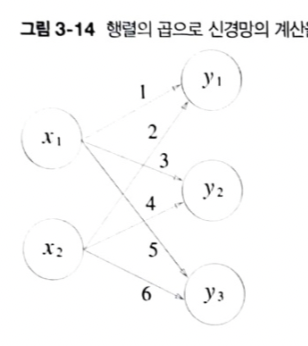

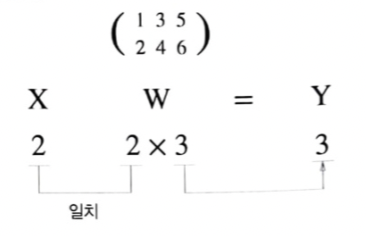

$$
y_1 = x_1·1 + x_2·2
$$
$$
y_2 = x_1·3 + x_2·4
$$
$$
y_3 = x_1·5 + x_2·6
$$

이전의 층(X)에서 다음층(Y)으로 넘어갈 때 곱해지는 가중치(W)는 행렬 내적의 원리에 의해 행렬의 형태를 띌 수 밖에 없다.

# 3.5 신경망 구현하기

## 3.5.1 입력층에서 1층으로 신호 전달

In [25]:
X = np.array([1, 0.5]) # 입력층
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # 가중치
B1 = np.array([0.1, 0.2, 0.3]) # 편향 

print('입력층 : ',X)
print('가중치 : \n',W1)
print('편향 : ',B1)
print()

A1 = np.dot(X,W1) + B1
print('은닉층에서의 가중치 합(가중 신호와 편향의 합) : \n',A1)
Z1 = sigmoid(A1)
print('은닉층에서 가중치 합이 활성화 함수 h()로 변환된 신호 z :\n',Z1)

입력층 :  [1.  0.5]
가중치 : 
 [[0.1 0.3 0.5]
 [0.2 0.4 0.6]]
편향 :  [0.1 0.2 0.3]

은닉층에서의 가중치 합(가중 신호와 편향의 합) : 
 [0.3 0.7 1.1]
은닉층에서 가중치 합이 활성화 함수 h()로 변환된 신호 z :
 [0.57444252 0.66818777 0.75026011]


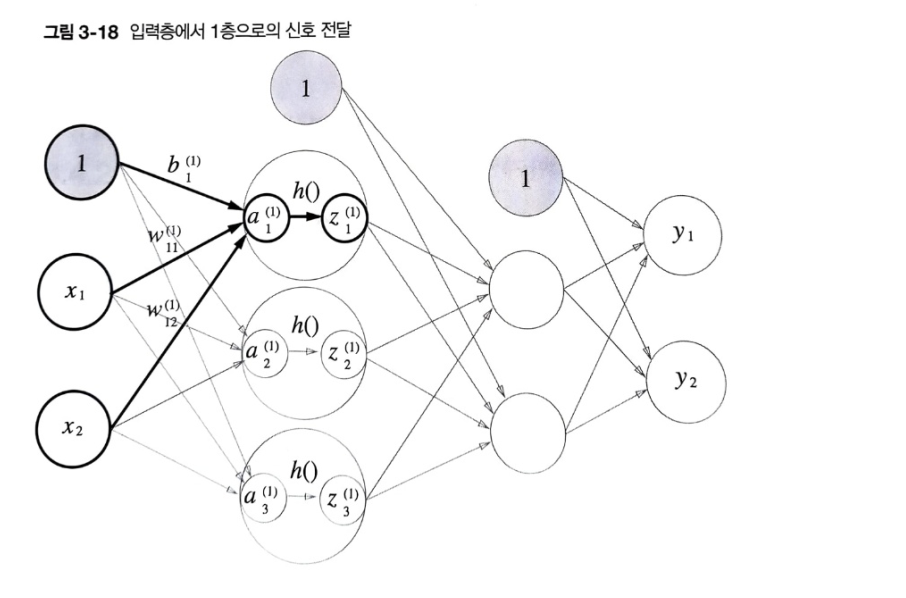 

## 3.5.2 1층에서 2층으로 신호 전달

In [ ]:
X = np.array([1, 0.5]) # 입력층
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # 가중치
B1 = np.array([0.1, 0.2, 0.3]) # 편향 

print('입력층 : ',X)
print('가중치 : \n',W1)
print('편향 : ',B1)
print()

A1 = np.dot(X,W1) + B1
print('은닉층에서의 가중치 합(가중 신호와 편향의 합) : \n',A1)
Z1 = sigmoid(A1)
print('은닉층에서 가중치 합이 활성화 함수 h()로 변환된 신호 z :\n',Z1)

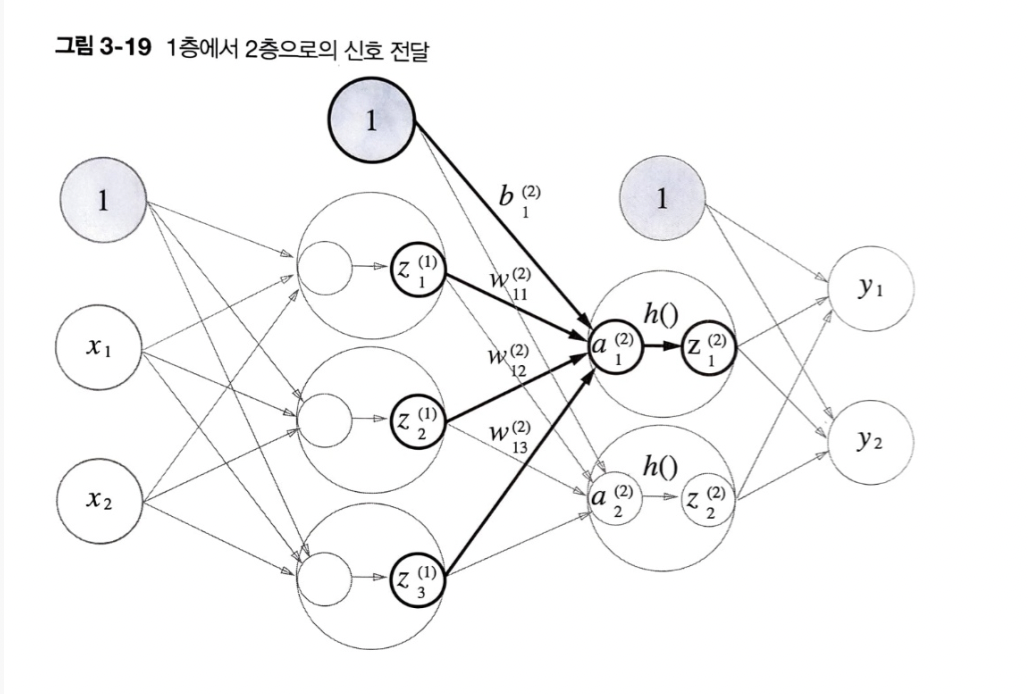

## 3.5.3 2층에서 출력층으로 신호 전달